# Chapter 12: Introduction to Modeling Libraries in Python

# 12.1: Interfacing Between pandas and Model Code

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.DataFrame({
    "x0":[1,2,3,4,5],
    "x1":[0.01,-0.01,0.25,-4.1,0],
    "y":[-1.5,0,3.6,1.3,-2]
})
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [3]:
data.columns

Index(['x0', 'x1', 'y'], dtype='object')

In [4]:
data.to_numpy()

array([[ 1.  ,  0.01, -1.5 ],
       [ 2.  , -0.01,  0.  ],
       [ 3.  ,  0.25,  3.6 ],
       [ 4.  , -4.1 ,  1.3 ],
       [ 5.  ,  0.  , -2.  ]])

In [6]:
df2=pd.DataFrame(data.to_numpy(),columns=["one","two","three"])
df2

,one,two,three
0,1.0,0.01,-1.5
1,2.0,-0.01,0.0
2,3.0,0.25,3.6
3,4.0,-4.10,1.3
4,5.0,0.00,-2.0


In [7]:
df3=data.copy()
df3["strings"]=["a","b","c","d","e"]
df3

,x0,x1,y,strings
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,c
3,4,-4.10,1.3,d
4,5,0.00,-2.0,e


In [8]:
df3.to_numpy()

array([[1, 0.01, -1.5, 'a'],
       [2, -0.01, 0.0, 'b'],
       [3, 0.25, 3.6, 'c'],
       [4, -4.1, 1.3, 'd'],
       [5, 0.0, -2.0, 'e']], dtype=object)

In [10]:
model_cols=["x0","x1"]
data.loc[:,model_cols].to_numpy()

array([[ 1.  ,  0.01],
       [ 2.  , -0.01],
       [ 3.  ,  0.25],
       [ 4.  , -4.1 ],
       [ 5.  ,  0.  ]])

In [11]:
data["category"]=pd.Categorical(["a","b","a","a","b"],categories=["a","b"])
data

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.0,b


In [12]:
dummies=pd.get_dummies(data.category,prefix="category",dtype=float)
dummies

,category_a,category_b
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [13]:
data_with_dummies=data.drop("category",axis=1).join(dummies)
data_with_dummies

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1.0,0.0
1,2,-0.01,0.0,0.0,1.0
2,3,0.25,3.6,1.0,0.0
3,4,-4.10,1.3,1.0,0.0
4,5,0.00,-2.0,0.0,1.0


# 12.2: Creating Model Descriptions with Patsy

In [14]:
import patsy

In [18]:
data=data.drop("category",axis=1)
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [20]:
y,X=patsy.dmatrices("y~x0+x1",data)

In [21]:
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [22]:
X

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2  -0.01
          1   3   0.25
          1   4  -4.10
          1   5   0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [23]:
np.asarray(y)
np.asarray(X)

array([[-1.5],
       [ 0. ],
       [ 3.6],
       [ 1.3],
       [-2. ]])

array([[ 1.  ,  1.  ,  0.01],
       [ 1.  ,  2.  , -0.01],
       [ 1.  ,  3.  ,  0.25],
       [ 1.  ,  4.  , -4.1 ],
       [ 1.  ,  5.  ,  0.  ]])

In [26]:
patsy.dmatrices("y~x0+x1+0",data)[1]

DesignMatrix with shape (5, 2)
  x0     x1
   1   0.01
   2  -0.01
   3   0.25
   4  -4.10
   5   0.00
  Terms:
    'x0' (column 0)
    'x1' (column 1)

In [27]:
np.linalg.lstsq(X,y,rcond=None)

(array([[ 0.31290976],
        [-0.07910564],
        [-0.26546384]]),
 array([19.63791494]),
 3,
 array([8.03737688, 3.38335321, 0.90895207]))

In [28]:
coef,resid,_,_=np.linalg.lstsq(X,y,rcond=None)
coef

array([[ 0.31290976],
       [-0.07910564],
       [-0.26546384]])

In [32]:
coef=pd.Series(coef.squeeze(),index=X.design_info.column_names)
coef

Intercept    0.312910
x0          -0.079106
x1          -0.265464
dtype: float64

In [29]:
coef.squeeze()

array([ 0.31290976, -0.07910564, -0.26546384])

### Data Transformations in Patsy Formulas

In [34]:
y,X=patsy.dmatrices("y~x0+np.log(abs(x1)+1)",data)
X

DesignMatrix with shape (5, 3)
  Intercept  x0  np.log(abs(x1) + 1)
          1   1              0.00995
          1   2              0.00995
          1   3              0.22314
          1   4              1.62924
          1   5              0.00000
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'np.log(abs(x1) + 1)' (column 2)

In [36]:
y,X=patsy.dmatrices("y~standardize(x0)+center(x1)",data)
X

DesignMatrix with shape (5, 3)
  Intercept  standardize(x0)  center(x1)
          1         -1.41421        0.78
          1         -0.70711        0.76
          1          0.00000        1.02
          1          0.70711       -3.33
          1          1.41421        0.77
  Terms:
    'Intercept' (column 0)
    'standardize(x0)' (column 1)
    'center(x1)' (column 2)

In [39]:
X.design_info

DesignInfo(['Intercept', 'standardize(x0)', 'center(x1)'],
           factor_infos={EvalFactor('standardize(x0)'): FactorInfo(factor=EvalFactor('standardize(x0)'),
                                    type='numerical',
                                    state=<factor state>,
                                    num_columns=1),
                         EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
                                    type='numerical',
                                    state=<factor state>,
                                    num_columns=1)},
           term_codings=OrderedDict([(Term([]),
                                      [SubtermInfo(factors=(),
                                                   contrast_matrices={},
                                                   num_columns=1)]),
                                     (Term([EvalFactor('standardize(x0)')]),
                                      [SubtermInfo(factors=(EvalFactor('standardiz

In [41]:
new_data=pd.DataFrame({
    "x0":[6,7,8,9],
    "x1":[3.1,-0.5,0,2.3],
    "y":[1,2,3,4]})

new_X=patsy.build_design_matrices([X.design_info],new_data)
new_X

[DesignMatrix with shape (4, 3)
   Intercept  standardize(x0)  center(x1)
           1          2.12132        3.87
           1          2.82843        0.27
           1          3.53553        0.77
           1          4.24264        3.07
   Terms:
     'Intercept' (column 0)
     'standardize(x0)' (column 1)
     'center(x1)' (column 2)]

In [42]:
patsy.dmatrices("y~standardize(x0)+center(x1)",new_data)

(DesignMatrix with shape (4, 1)
   y
   1
   2
   3
   4
   Terms:
     'y' (column 0),
 DesignMatrix with shape (4, 3)
   Intercept  standardize(x0)  center(x1)
           1         -1.34164       1.875
           1         -0.44721      -1.725
           1          0.44721      -1.225
           1          1.34164       1.075
   Terms:
     'Intercept' (column 0)
     'standardize(x0)' (column 1)
     'center(x1)' (column 2))

In [43]:
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [44]:
y,X=patsy.dmatrices("y~I(x0+x1)",data)
X

DesignMatrix with shape (5, 2)
  Intercept  I(x0 + x1)
          1        1.01
          1        1.99
          1        3.25
          1       -0.10
          1        5.00
  Terms:
    'Intercept' (column 0)
    'I(x0 + x1)' (column 1)

### Catgeorical Data and Patsy

In [45]:
data=pd.DataFrame({
    "key1":["a","a","b","b","a","b","a","b"],
    "key2":[0,1,0,1,0,1,0,0],
    "v1":[1,2,3,4,5,6,7,8],
    "v2":[-1,0,2.5,-0.5,4,-1.2,0.2,-1.7]
})
data

,key1,key2,v1,v2
0,a,0,1,-1.0
1,a,1,2,0.0
2,b,0,3,2.5
3,b,1,4,-0.5
4,a,0,5,4.0
5,b,1,6,-1.2
6,a,0,7,0.2
7,b,0,8,-1.7


In [46]:
y,X=patsy.dmatrices("v2~key1",data)
X

DesignMatrix with shape (8, 2)
  Intercept  key1[T.b]
          1          0
          1          0
          1          1
          1          1
          1          0
          1          1
          1          0
          1          1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)

In [47]:
y,X=patsy.dmatrices("v2~key1+0",data)
X

DesignMatrix with shape (8, 2)
  key1[a]  key1[b]
        1        0
        1        0
        0        1
        0        1
        1        0
        0        1
        1        0
        0        1
  Terms:
    'key1' (columns 0:2)

In [48]:
y,X=patsy.dmatrices("v2~C(key2)",data)
X

DesignMatrix with shape (8, 2)
  Intercept  C(key2)[T.1]
          1             0
          1             1
          1             0
          1             1
          1             0
          1             1
          1             0
          1             0
  Terms:
    'Intercept' (column 0)
    'C(key2)' (column 1)

In [49]:
data["key2"]=data["key2"].map({0:"zero",1:"one"})
data

,key1,key2,v1,v2
0,a,zero,1,-1.0
1,a,one,2,0.0
2,b,zero,3,2.5
3,b,one,4,-0.5
4,a,zero,5,4.0
5,b,one,6,-1.2
6,a,zero,7,0.2
7,b,zero,8,-1.7


In [50]:
y,X=patsy.dmatrices("v2~key1+key2",data)
X

DesignMatrix with shape (8, 3)
  Intercept  key1[T.b]  key2[T.zero]
          1          0             1
          1          0             0
          1          1             1
          1          1             0
          1          0             1
          1          1             0
          1          0             1
          1          1             1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)

In [51]:
y,X=patsy.dmatrices("v2~key1+key2+key1:key2",data)
X

DesignMatrix with shape (8, 4)
  Intercept  key1[T.b]  key2[T.zero]  key1[T.b]:key2[T.zero]
          1          0             1                       0
          1          0             0                       0
          1          1             1                       1
          1          1             0                       0
          1          0             1                       0
          1          1             0                       0
          1          0             1                       0
          1          1             1                       1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)
    'key1:key2' (column 3)

# 12.3: Introduction to statsmodels

### Estimating Linear Models

In [53]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [55]:
rng=np.random.default_rng(seed=12345)

def dnorm(mean,variance,size=1):
    if isinstance(size,int):
        size=size
    return mean+np.sqrt(variance) * rng.standard_normal(size)

N=100
X=np.c_[dnorm(0,0.4,size=N),
        dnorm(0,0.6,size=N),
        dnorm(0,0.2,size=N)]
eps=dnorm(0,0.1,size=N)
beta=[0.1,0.3,0.5]
y=np.dot(X,beta)+eps

In [56]:
X

array([[-9.00506021e-01, -1.89429577e-01, -1.02787020e+00],
       [ 7.99252054e-01, -1.54598388e+00, -3.27397080e-01],
       [-5.50654833e-01, -1.20254287e-01,  3.29358994e-01],
       [-1.63915546e-01,  8.24039852e-01,  2.08274848e-01],
       [-4.76512913e-02, -2.13146980e-01, -4.82436357e-02],
       [-4.68576597e-01, -1.43558784e+00, -1.52694953e-01],
       [-8.65068061e-01, -9.63148432e-02,  7.08625055e-01],
       [ 4.10395842e-01,  6.08038650e-01,  1.26222105e-01],
       [ 2.28353201e-01,  1.56467440e-01,  4.06761512e-01],
       [-1.23509905e+00, -3.31585038e-01,  1.76681376e-01],
       [ 1.48463222e+00,  1.43167842e+00, -2.99354280e-01],
       [ 6.12531226e-01,  1.47169718e+00,  6.95582154e-01],
       [-4.80278623e-01, -7.62397041e-02, -5.53712608e-01],
       [ 5.70600290e-01,  6.30092128e-01, -5.34945034e-01],
       [-2.95327118e-01,  3.04024846e-01, -1.91921494e-01],
       [-3.83834219e-02,  6.05303068e-01, -3.26313824e-01],
       [ 4.98908970e-01,  1.12569928e+00

In [57]:
np.c_[[1,2,3],[4,5,6]]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [58]:
eps

array([ 0.0612879 , -0.04088595,  0.11209613, -0.34243439,  0.07745659,
        0.06982967, -0.20884709, -0.06910688, -0.17582233,  0.42892534,
       -0.98650687, -0.45779399, -0.5394167 , -0.11957202, -0.21455862,
       -0.13004738,  0.22737176, -0.51624799, -0.26743181, -0.07055043,
       -0.38017481,  0.11700038,  0.10435433, -0.22466294, -0.56007326,
        0.50622874,  0.14897429,  0.13400171,  0.02285077, -0.00232331,
        0.2628092 , -0.0049349 , -0.1995101 ,  0.22436404,  0.01887727,
       -0.24427828, -0.28657796,  0.36855691,  0.19955471,  0.62471383,
       -0.166543  , -0.23512818,  0.12772141,  0.43620675,  0.18870968,
        0.13697503,  0.59671802, -0.23508086, -0.39463613, -0.23546899,
       -0.10019898,  0.11806405,  0.32317224,  0.12826506,  0.4817141 ,
       -0.26168105,  0.60257057, -0.25678381,  0.3702193 , -0.29657199,
        0.10855056,  0.01609549,  0.16366673,  0.23762137, -0.0674195 ,
       -0.0211315 ,  0.07561376, -0.41267981, -0.23123727, -0.51

In [59]:
y

array([-0.59952668, -0.58845445,  0.18563386, -0.00747657, -0.01537445,
       -0.48405182,  0.03006418,  0.21745535,  0.09733398,  0.29428061,
       -0.55821726,  0.39275937, -0.88717278, -0.14095687, -0.24884462,
       -0.11545172,  0.49031861, -0.53928623,  0.01003077, -0.12181392,
       -0.40652191, -0.26296953,  0.24121365, -0.01486882, -0.8269326 ,
        0.85796862, -0.1581605 ,  0.3229089 , -0.3182448 , -0.25177682,
        0.01201277, -0.27692688,  0.48915537,  0.02713607,  0.32623478,
       -0.67005187, -0.43638036,  0.19876113,  0.29108143,  1.22925781,
       -0.13454699,  0.11618133, -0.28334439,  0.82639714,  0.65173309,
        0.36932726,  0.46060306, -0.36001815, -0.67943794, -0.32391053,
        0.22890353,  0.33392927, -0.02893472,  0.3514912 ,  0.4104761 ,
        0.02342595, -0.08816253, -0.42223253,  0.95031167, -0.84319881,
       -0.17742481, -0.58276729, -0.04786858,  0.49981461, -0.40998529,
       -0.06505591, -0.11920059, -0.73782536,  0.11294051, -0.50

In [60]:
X[:5]
y[:5]

array([[-0.90050602, -0.18942958, -1.0278702 ],
       [ 0.79925205, -1.54598388, -0.32739708],
       [-0.55065483, -0.12025429,  0.32935899],
       [-0.16391555,  0.82403985,  0.20827485],
       [-0.04765129, -0.21314698, -0.04824364]])

array([-0.59952668, -0.58845445,  0.18563386, -0.00747657, -0.01537445])

In [62]:
X_model=sm.add_constant(X)
X_model[:5]

array([[ 1.        , -0.90050602, -0.18942958, -1.0278702 ],
       [ 1.        ,  0.79925205, -1.54598388, -0.32739708],
       [ 1.        , -0.55065483, -0.12025429,  0.32935899],
       [ 1.        , -0.16391555,  0.82403985,  0.20827485],
       [ 1.        , -0.04765129, -0.21314698, -0.04824364]])

In [74]:
model=sm.OLS(y,X_model)
model

In [75]:
results=model.fit()
results

In [76]:
results.params

array([-0.02079903,  0.06581276,  0.26897046,  0.44941894])

In [77]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     28.36
Date:                Sat, 20 Jul 2024   Prob (F-statistic):           3.23e-13
Time:                        19:29:34   Log-Likelihood:                -25.390
No. Observations:                 100   AIC:                             58.78
Df Residuals:                      96   BIC:                             69.20
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0208      0.032     -0.653      0.5

In [70]:
data=pd.DataFrame(X,columns=["col0","col1","col2"])
data

,col0,col1,col2
0,-0.900506,-0.189430,-1.027870
1,0.799252,-1.545984,-0.327397
2,-0.550655,-0.120254,0.329359
3,-0.163916,0.824040,0.208275
4,-0.047651,-0.213147,-0.048244
...,...,...,...
95,-0.039152,0.531515,-0.587640
96,-0.227355,0.941139,-0.228237
97,-0.473484,0.167359,-0.044659
98,-0.610622,-0.747349,-0.057917


In [71]:
data["y"]=y

In [72]:
data

,col0,col1,col2,y
0,-0.900506,-0.189430,-1.027870,-0.599527
1,0.799252,-1.545984,-0.327397,-0.588454
2,-0.550655,-0.120254,0.329359,0.185634
3,-0.163916,0.824040,0.208275,-0.007477
4,-0.047651,-0.213147,-0.048244,-0.015374
...,...,...,...,...
95,-0.039152,0.531515,-0.587640,-0.067934
96,-0.227355,0.941139,-0.228237,0.831554
97,-0.473484,0.167359,-0.044659,0.070316
98,-0.610622,-0.747349,-0.057917,-0.386481


In [78]:
results=smf.ols("y~col0+col1+col2",data=data).fit()
results.params

Intercept   -0.020799
col0         0.065813
col1         0.268970
col2         0.449419
dtype: float64

In [79]:
results.tvalues

Intercept   -0.652501
col0         1.219768
col1         6.312369
col2         6.567428
dtype: float64

In [80]:
results.predict(data[:5])
data[:5]

0   -0.592959
1   -0.531160
2    0.058636
3    0.283658
4   -0.102947
dtype: float64

,col0,col1,col2,y
0,-0.900506,-0.189430,-1.027870,-0.599527
1,0.799252,-1.545984,-0.327397,-0.588454
2,-0.550655,-0.120254,0.329359,0.185634
3,-0.163916,0.824040,0.208275,-0.007477
4,-0.047651,-0.213147,-0.048244,-0.015374


### Estimating Time Series Processes

In [81]:
init_x=4
values=[init_x,init_x]
N=1000
b0=0.8
b1=-0.4
noise=dnorm(0,0.1,N)
for i in range(N):
    new_x=values[-1]*b0+values[-2]*b1+noise[i]
    values.append(new_x)

In [82]:
values

[4,
 4,
 2.162241438276088,
 0.44422094827559927,
 -0.6607715230366092,
 -0.9778708006223169,
 -0.8123487376194569,
 -0.46804162440473274,
 0.07272851251167171,
 0.5129244475086844,
 -0.33657239203870504,
 -0.48033108487762244,
 -0.599073563761888,
 -0.07117456048132176,
 0.47188591699813454,
 0.1598420072685836,
 -0.2030008567813913,
 -0.5272657218872513,
 -0.216942343384577,
 -0.4717622136502468,
 -0.6465709787864812,
 -0.54504896407076,
 0.2104485696563298,
 1.1461070480068551,
 0.8390176167974824,
 -0.17668574926248393,
 -0.45349582492225854,
 -0.5669399715342323,
 -0.12674593260033934,
 -0.22680504581457722,
 -0.24758782294156595,
 -0.11180879959575558,
 0.17400875518321857,
 0.15961624751441733,
 0.4583986148569927,
 0.34215824153327346,
 -0.483211490808446,
 -0.23121936627170342,
 -0.08374903868492492,
 -0.18630890184451443,
 0.3612242528212131,
 0.04929709771902835,
 -0.08207256165400462,
 -0.31083921670932185,
 0.21183323158242637,
 0.17868989891835324,
 0.13275334578151776,
 

In [83]:
from matplotlib.pyplot import plot

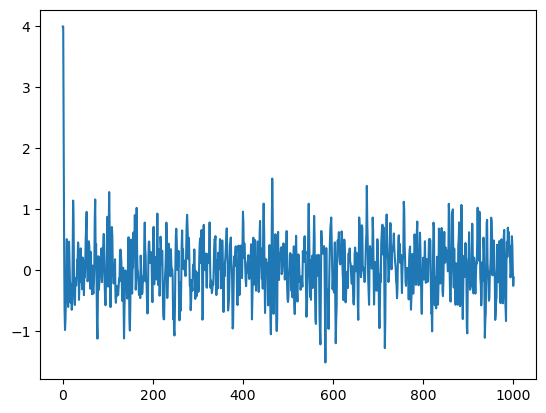

In [84]:
plot(values)

In [86]:
from statsmodels.tsa.ar_model import AutoReg
MAXLAGS=5
model=AutoReg(values,MAXLAGS)
results=model.fit()
results.params

array([ 0.02346612,  0.8096828 , -0.42865278, -0.03336517,  0.04267874,
       -0.05671529])

## 12.4: Introduction to scikit-learn

In [87]:
train=pd.read_csv("../../datasets/titanic/train.csv")
test=pd.read_csv("../../datasets/titanic/test.csv")

In [88]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [89]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [90]:
train.isna().sum()
test.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [91]:
impute_value=train["Age"].median()
train["Age"]=train["Age"].fillna(impute_value)
test["Age"]=test["Age"].fillna(impute_value)

In [92]:
train["IsFemale"]=(train["Sex"]=="female").astype(int)
test["IsFemale"]=(test["Sex"]=="female").astype(int)

In [93]:
train
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsFemale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsFemale
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0


In [94]:
predictors=["Pclass","IsFemale","Age"]
X_train=train[predictors].to_numpy()
X_test=test[predictors].to_numpy()
y_train=train["Survived"].to_numpy()

In [95]:
X_train
X_test
y_train

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       ...,
       [ 3.,  1., 28.],
       [ 1.,  0., 26.],
       [ 3.,  0., 32.]])

array([[ 3. ,  0. , 34.5],
       [ 3. ,  1. , 47. ],
       [ 2. ,  0. , 62. ],
       ...,
       [ 3. ,  0. , 38.5],
       [ 3. ,  0. , 28. ],
       [ 3. ,  0. , 28. ]])

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
model=LogisticRegression()
model

LogisticRegression()

In [101]:
model.fit(X_train,y_train)

LogisticRegression()

In [102]:
y_predict=model.predict(X_test)
y_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [103]:
from sklearn.linear_model import LogisticRegressionCV

In [105]:
model_cv=LogisticRegressionCV(Cs=10)
model_cv

LogisticRegressionCV()

In [106]:
from sklearn.model_selection import cross_val_score


scores=cross_val_score(model,X_train,y_train,cv=4)
scores

array([0.77578475, 0.79820628, 0.77578475, 0.78828829])